# Clase 6: Clustering
## Introducción

En esta clase, nos enfocaremos en el "clustering" o agrupamiento, una técnica esencial que nos permite identificar patrones y agrupaciones naturales en nuestros datos. Aprenderemos sobre tres técnicas populares de clustering: K-Means, Redes Neuronales SOM (Self-Organizing Maps) y DBScan. También aplicaremos estas técnicas en un conjunto de datos práctico y analizaremos los resultados.

### Contenido de la Clase

- ¿Qué es el Clustering?
  - Definición y objetivos del clustering.
  - Aplicaciones reales y beneficios.
- Técnicas de Clustering
  - K-Means
  - Redes Neuronales SOM (Self-Organizing Maps)
  - DBScan
- Actividad práctica
  - Selección y preparación de un conjunto de datos.
  - Aplicación de técnicas de clustering.
  - Visualización y análisis de resultados.

## Preparación del Entorno

Primero, carguemos las bibliotecas necesarias para esta clase.


## ¿Qué es el Clustering?

El clustering, también conocido como agrupamiento, es una técnica de minería de datos que tiene como objetivo principal dividir un conjunto de datos en grupos de manera que los datos en el mismo grupo (o cluster) sean más similares entre sí que con los de otros grupos. Es una técnica no supervisada, lo que significa que no se basa en datos etiquetados previamente para formar los grupos.

### Objetivos del Clustering

- **Descubrir estructuras inherentes en los datos**: Agrupar datos similares juntos puede revelar patrones y relaciones que no son inmediatamente obvios.
- **Simplificar el análisis de datos**: Trabajar con grupos de datos en lugar de datos individuales puede hacer que el análisis sea más manejable y significativo.

### Aplicaciones Reales y Beneficios

- **Marketing**: Segmentación de clientes para campañas de marketing dirigidas.
- **Biotecnología**: Agrupación de genes o proteínas con funciones o patrones de expresión similares.
- **Recomendación de Contenido**: Agrupación de elementos similares para recomendaciones personalizadas en sitios web como Netflix o Spotify.
- **Reducción de Dimensionalidad**: Usar clustering para reducir la cantidad de datos antes de aplicar otras técnicas de minería de datos.
- **Detección de Anomalías**: Identificar actividades sospechosas en ciberseguridad mediante el agrupamiento de patrones de comportamiento.

### Beneficios del Clustering

- **Descubrimiento de Patrones Ocultos**: Revela estructuras y relaciones en los datos que no son inmediatamente obvias.
- **Toma de Decisiones**: Ayuda a las organizaciones a tomar decisiones informadas basadas en grupos de datos.
- **Personalización**: Permite ofrecer productos y servicios personalizados basados en segmentos de clientes.


## Técnicas de Clustering: K-Means

K-Means es uno de los algoritmos de clustering más populares y ampliamente utilizados. Es un método de particionamiento que divide un conjunto de datos en K clusters distintos y no superpuestos, donde K es un número predefinido.

### Funcionamiento de K-Means

1. **Inicialización**: Se seleccionan K puntos de datos al azar como los centros iniciales de los clusters (centroides).
2. **Asignación**: Cada punto de datos se asigna al centroide más cercano, formando K clusters.
3. **Recálculo de Centroides**: Se recalcula el centroide (media) de cada cluster.
4. **Repetición**: Los pasos 2 y 3 se repiten hasta que los centroides no cambien significativamente o se alcance un número máximo de iteraciones.

### Ventajas y Desventajas de K-Means

- **Ventajas**:
  - Simple y fácil de implementar.
  - Eficiente en términos de complejidad computacional.
  - Produce clusters más ajustados si las formas de los clusters son esféricas.

- **Desventajas**:
  - Necesita especificar el número K de clusters de antemano.
  - Sensible a la inicialización de los centroides.
  - Puede quedar atrapado en mínimos locales.
  - Asume que los clusters son convexos y similares en tamaño.

### Ejemplo en Python


C:\Users\Ever\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1429: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=2.
  warnings.warn(


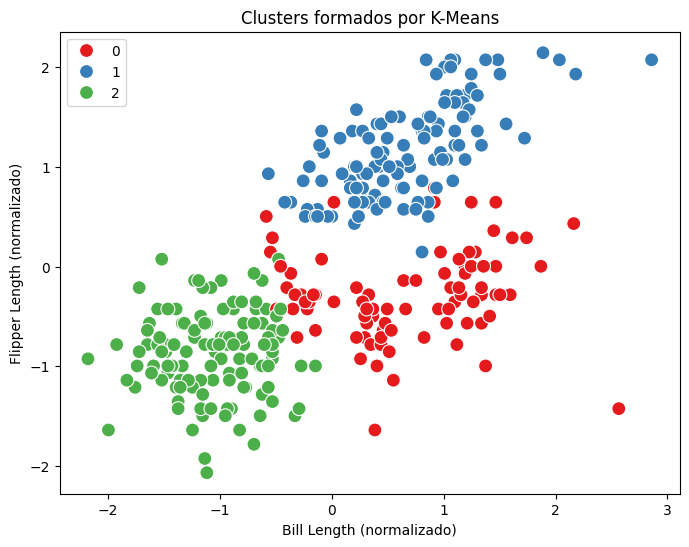

In [16]:
# Importar bibliotecas
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler

# Cargar el dataset "penguins"
df = sns.load_dataset('penguins').dropna()

# Seleccionar las características numéricas para el clustering
X = df[['bill_length_mm', 'bill_depth_mm', 'flipper_length_mm', 'body_mass_g']]

# Normalizar los datos
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Aplicar K-Means con 3 clusters
kmeans = KMeans(n_clusters=3)
kmeans.fit(X_scaled)
labels = kmeans.labels_

# Visualización de los clusters
plt.figure(figsize=(8, 6))
sns.scatterplot(x=X_scaled[:, 0], y=X_scaled[:, 2], hue=labels, palette="Set1", s=100)
plt.title('Clusters formados por K-Means')
plt.xlabel('Bill Length (normalizado)')
plt.ylabel('Flipper Length (normalizado)')
plt.show()


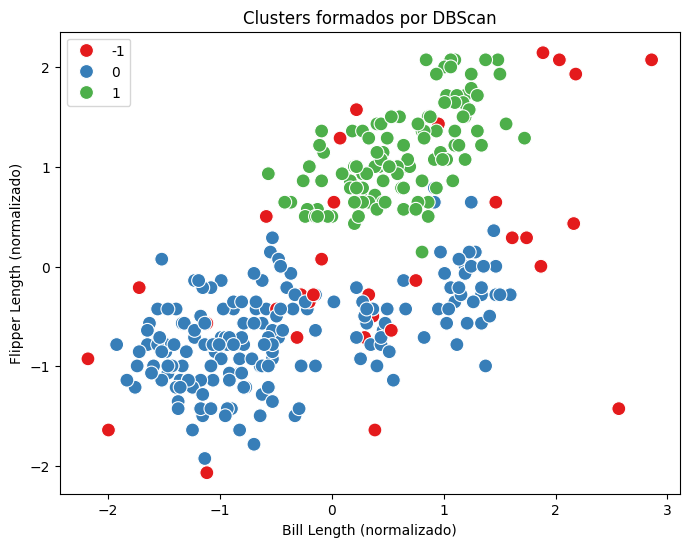

In [17]:
# Importar DBScan
from sklearn.cluster import DBSCAN

# Aplicar DBScan
dbscan = DBSCAN(eps=0.6, min_samples=5)
labels_dbscan = dbscan.fit_predict(X_scaled)

# Visualización de los clusters formados por DBScan
plt.figure(figsize=(8, 6))
sns.scatterplot(x=X_scaled[:, 0], y=X_scaled[:, 2], hue=labels_dbscan, palette="Set1", s=100)
plt.title('Clusters formados por DBScan')
plt.xlabel('Bill Length (normalizado)')
plt.ylabel('Flipper Length (normalizado)')
plt.show()


In [3]:
!pip install minisom

  Preparing metadata (setup.py): started
  Preparing metadata (setup.py): finished with status 'done'
  Created wheel for minisom: filename=MiniSom-2.3.3-py3-none-any.whl size=11718 sha256=18f848c956663dbb6791c12fa81f0a90295cc648f22d81cbd4d4b9ff9deb4bd5
  Stored in directory: c:\users\ever\appdata\local\pip\cache\wheels\c8\29\ba\ee521d9a6af783a1e1efb1831fe4afdf526613849b3f58175b
Successfully built minisom


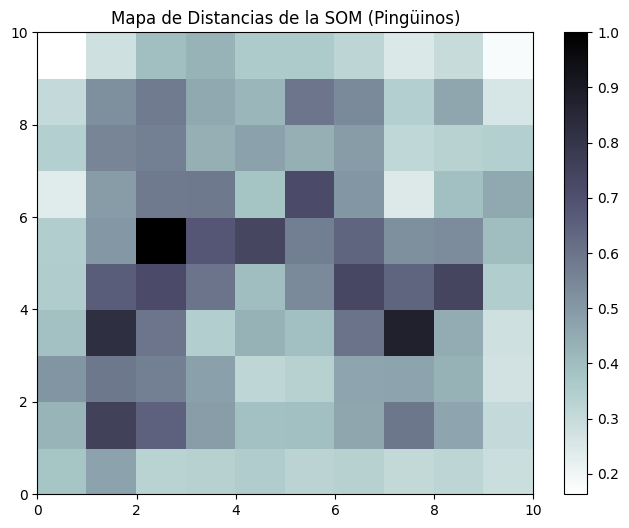

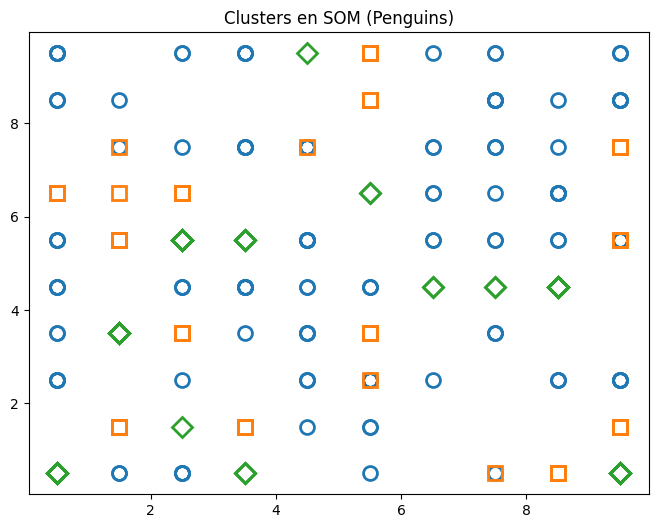

In [18]:

# Importar librerías adicionales
import numpy as np
from minisom import MiniSom

# Normalización de los datos (ya hecho en el ejemplo anterior)
X_som = X_scaled

# Convertir las especies en códigos numéricos explícitamente
df['species_code'] = df['species'].astype('category').cat.codes

# Entrenar una SOM
som_shape = (10, 10)  # Tamaño del mapa SOM
som = MiniSom(som_shape[0], som_shape[1], X_som.shape[1], sigma=1.0, learning_rate=0.5)
som.random_weights_init(X_som)
som.train_random(X_som, 100)  # Entrenar SOM con 100 iteraciones

# Mapa de distancias de SOM
plt.figure(figsize=(8, 6))
plt.pcolor(som.distance_map().T, cmap='bone_r')
plt.colorbar()
plt.title('Mapa de Distancias de la SOM (Pingüinos)')
plt.show()

# Visualización de clusters en SOM
markers = ['o', 's', 'D']
colors = ['C0', 'C1', 'C2']

plt.figure(figsize=(8, 6))
for cnt, xx in enumerate(X_som):
    w = som.winner(xx)  # Neurona ganadora
    plt.plot(w[0] + 0.5, w[1] + 0.5, markers[df['species_code'].iloc[cnt]],
             markerfacecolor='None', markeredgecolor=colors[df['species_code'].iloc[cnt]],
             markersize=10, markeredgewidth=2)

plt.title('Clusters en SOM (Penguins)')
plt.show()



### Enunciado para Aplicación de Técnicas de Clustering con el Dataset "Wine"
Objetivo: En esta actividad, aplicarás tres técnicas de clustering (K-Means, Self-Organizing Maps (SOM), y DBScan) utilizando el dataset "Wine" de sklearn. Este dataset contiene características químicas de diferentes tipos de vinos cultivados en la región italiana de Piamonte.

El objetivo es identificar agrupaciones naturales entre los vinos basados en sus propiedades químicas y visualizar los resultados de cada técnica.

### Descripción del Dataset "Wine":
Este dataset tiene 178 muestras de vino, cada una descrita por 13 características químicas que incluyen:

- Alcohol
- Ácido málico
- Cenizas
- Alcalinidad de las cenizas
- Magnesio
- Fenoles totales
- Flavonoides
- Fenoles no flavonoides
- Proantocianinas
- Intensidad del color
- Tono
- OD280/OD315 de vinos diluidos
- Prolina

Los vinos están categorizados en tres tipos diferentes (clases), pero no se te dará esta información para el clustering, ya que el objetivo es aplicar técnicas no supervisadas.

### <font color='yellow'>Carga el dataset "Wine" desde sklearn.datasets. </font>
Normaliza los datos utilizando un escalador como StandardScaler para que todas las características estén en la misma escala.

Aplicación de K-Means:
- Aplica el algoritmo K-Means con 3 clusters (correspondientes a los 3 tipos de vinos).
- Visualiza los resultados utilizando gráficos de dispersión con dos de las características más importantes del dataset (por ejemplo, alcohol y magnesio).
 
Aplicación de Self-Organizing Maps (SOM):
- Entrena una SOM con una red de neuronas de tamaño 10x10.
Visualiza la matriz de distancias de la SOM y los clusters formados por cada neurona ganadora.

Aplicación de DBScan:
- Aplica el algoritmo DBScan ajustando los parámetros eps y min_samples para obtener clusters bien definidos.
Visualiza los clusters formados utilizando gráficos de dispersión.

Análisis Comparativo:
- Compara los resultados de cada técnica de clustering y reflexiona sobre las diferencias en los clusters obtenidos.
- ¿Alguno de los algoritmos detectó agrupaciones más claras que los otros? - - ¿Cómo varían los resultados según la técnica?


In [20]:
# Carga y Normalizacion del dataset
from sklearn.datasets import load_wine
from sklearn.preprocessing import StandardScaler
import pandas as pd

# Cargar dataset Wine
data = load_wine()
X = data.data
wine_df = pd.DataFrame(X, columns=data.feature_names)

# Normalizar los datos
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Mostrar las primeras filas del dataset normalizado
wine_df_scaled = pd.DataFrame(X_scaled, columns=wine_df.columns)
wine_df_scaled.head()


,alcohol,malic_acid,ash,alcalinity_of_ash,magnesium,total_phenols,flavanoids,nonflavanoid_phenols,proanthocyanins,color_intensity,hue,od280/od315_of_diluted_wines,proline
0,1.518613,-0.562250,0.232053,-1.169593,1.913905,0.808997,1.034819,-0.659563,1.224884,0.251717,0.362177,1.847920,1.013009
1,0.246290,-0.499413,-0.827996,-2.490847,0.018145,0.568648,0.733629,-0.820719,-0.544721,-0.293321,0.406051,1.113449,0.965242
2,0.196879,0.021231,1.109334,-0.268738,0.088358,0.808997,1.215533,-0.498407,2.135968,0.269020,0.318304,0.788587,1.395148
3,1.691550,-0.346811,0.487926,-0.809251,0.930918,2.491446,1.466525,-0.981875,1.032155,1.186068,-0.427544,1.184071,2.334574
4,0.295700,0.227694,1.840403,0.451946,1.281985,0.808997,0.663351,0.226796,0.401404,-0.319276,0.362177,0.449601,-0.037874


### 2. Aplicación de K-Means

C:\Users\Ever\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1429: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


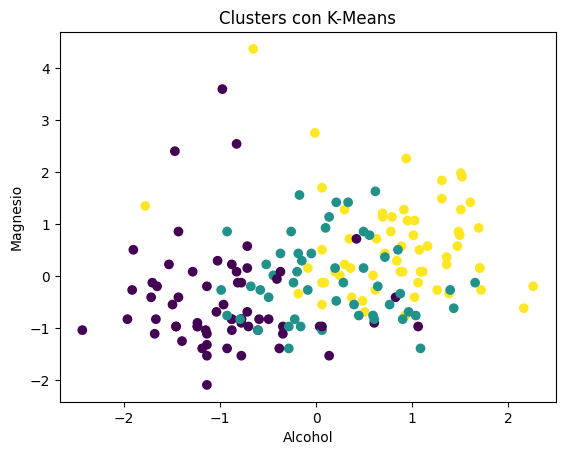

In [21]:
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt

# Aplicamos K-Means
kmeans = KMeans(n_clusters=3, random_state=42)
kmeans.fit(X_scaled)

# Gráfico de los vinos, usando alcohol y magnesio
plt.scatter(X_scaled[:, 0], X_scaled[:, 4], c=kmeans.labels_, cmap='viridis')
plt.xlabel('Alcohol')
plt.ylabel('Magnesio')
plt.title('Clusters con K-Means')
plt.show()


### 3. Aplicación de Self-Organizing Maps (SOM)

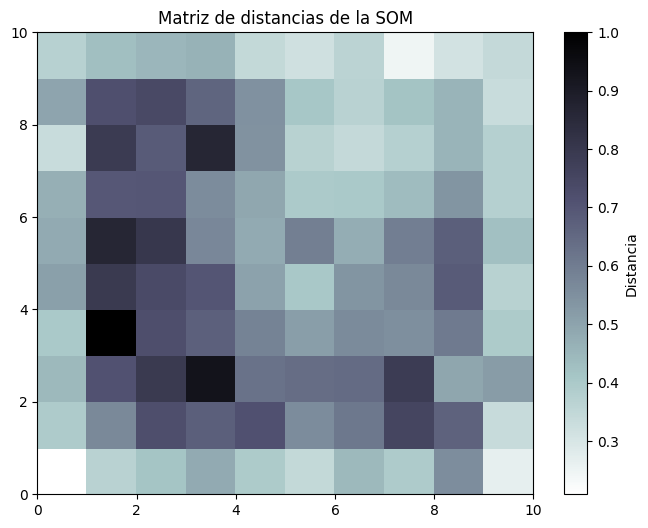

In [13]:
from minisom import MiniSom

# Definir y entrenar la SOM
som = MiniSom(x=10, y=10, input_len=X_scaled.shape[1], sigma=1.0, learning_rate=0.5)
som.random_weights_init(X_scaled)
som.train_random(X_scaled, 100)  # 100 iteraciones

# Visualizar la matriz de distancias de la SOM
plt.figure(figsize=(8, 6))
plt.pcolor(som.distance_map().T, cmap='bone_r')  # Matriz de distancias
plt.colorbar(label='Distancia')
plt.title('Matriz de distancias de la SOM')
plt.show()

# Asignar clusters a las neuronas ganadoras
win_map = som.win_map(X_scaled)


### 4. Aplicación de DBScan

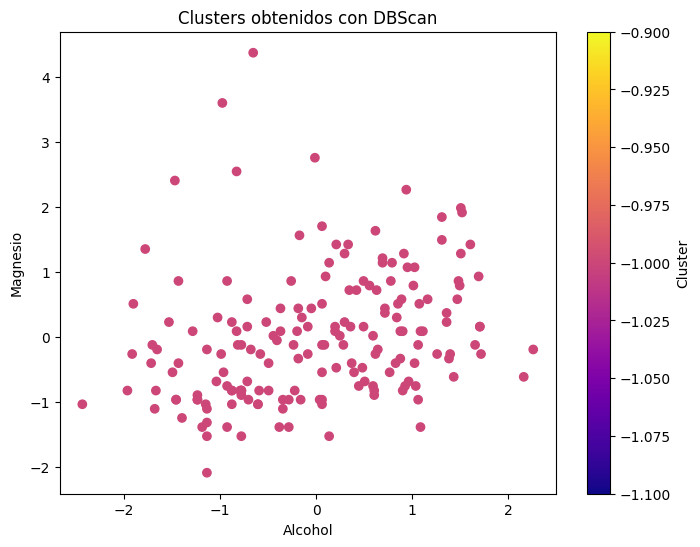

In [14]:
from sklearn.cluster import DBSCAN

# Aplicar DBScan ajustando los parámetros eps y min_samples
dbscan = DBSCAN(eps=1.5, min_samples=5)
dbscan.fit(X_scaled)

# Asignar las etiquetas de clusters al DataFrame
wine_df_scaled['DBScan Cluster'] = dbscan.labels_

# Visualizar los resultados usando dos características (por ejemplo, alcohol y magnesio)
plt.figure(figsize=(8, 6))
plt.scatter(wine_df_scaled['alcohol'], wine_df_scaled['magnesium'], c=wine_df_scaled['DBScan Cluster'], cmap='plasma')
plt.xlabel('Alcohol')
plt.ylabel('Magnesio')
plt.title('Clusters obtenidos con DBScan')
plt.colorbar(label='Cluster')
plt.show()


Después de ejecutar cada técnica, puedes comparar visualmente las diferencias en los clusters obtenidos. Por ejemplo, K-Means tiende a encontrar clusters esféricos, mientras que DBScan es mejor para descubrir clusters con formas irregulares. SOM ayudará a entender la topología de los datos a través de su matriz de distancias.



### Ejemplo de Mapeo de Frutas en un SOM

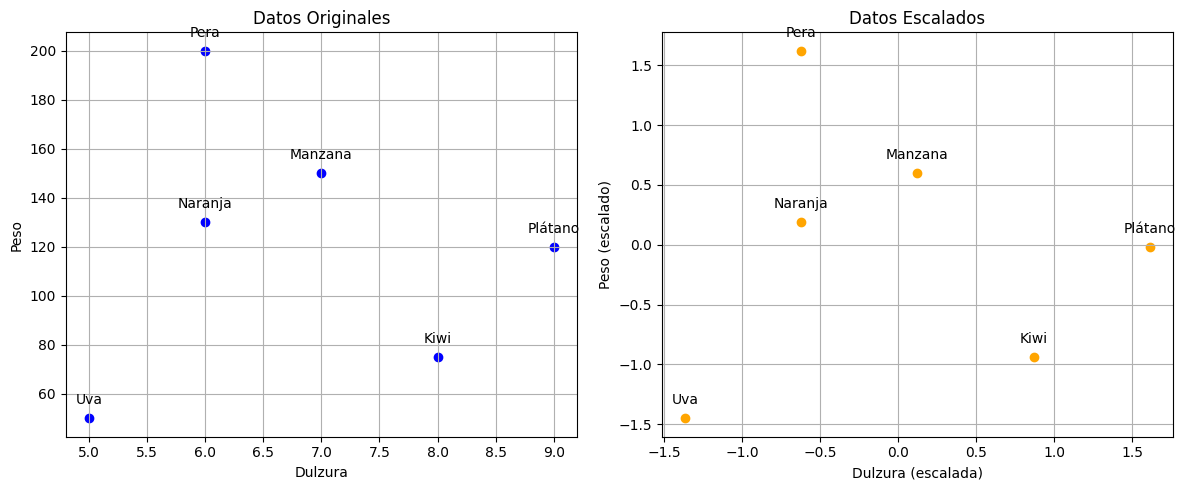

In [25]:
import numpy as np
import pandas as pd
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt

# Datos de frutas
data = {
    'Fruta': ['Manzana', 'Plátano', 'Naranja', 'Kiwi', 'Uva', 'Pera'],
    'Dulzura': [7, 9, 6, 8, 5, 6],
    'Peso': [150, 120, 130, 75, 50, 200]
}

df = pd.DataFrame(data)

# Crear un scaler
scaler = StandardScaler()

# Escalar los datos
scaled_data = scaler.fit_transform(df[['Dulzura', 'Peso']])

# Crear un nuevo DataFrame con los datos escalados
df_scaled = pd.DataFrame(scaled_data, columns=['Dulzura (escalada)', 'Peso (escalado)'])
df_scaled['Fruta'] = df['Fruta']  # Agregar la columna de frutas para referencia

# Gráfico de los datos originales
plt.figure(figsize=(12, 5))
plt.subplot(1, 2, 1)
plt.scatter(df['Dulzura'], df['Peso'], color='blue')

for i, txt in enumerate(df['Fruta']):
    plt.annotate(txt, (df['Dulzura'][i], df['Peso'][i]), textcoords="offset points", xytext=(0,10), ha='center')
    
plt.title('Datos Originales')
plt.xlabel('Dulzura')
plt.ylabel('Peso')
plt.grid()

# Gráfico de los datos escalados
plt.subplot(1, 2, 2)
plt.scatter(df_scaled['Dulzura (escalada)'], df_scaled['Peso (escalado)'], color='orange')
for i, txt in enumerate(df_scaled['Fruta']):
    plt.annotate(txt, (df_scaled['Dulzura (escalada)'][i], df_scaled['Peso (escalado)'][i]), textcoords="offset points", xytext=(0,10), ha='center')
plt.title('Datos Escalados')
plt.xlabel('Dulzura (escalada)')
plt.ylabel('Peso (escalado)')
plt.grid()

plt.tight_layout()
plt.show()


